## Investment Portfolio Analysis

**Date:** 18 October 2023 </br>
**Source:** https://finance.yahoo.com/ </br>
**Github url:** https://github.com/Silvere-Cawet/investment-portfolio-analysis </br>

**Authors:**

- SS Cawet 218066347
- BS Mgenge 223157278
- NG Buthelezi 217082940

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import scatter_matrix
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
import warnings

# Disable the PerformanceWarning
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

### Step 1: Define a time period for analysis & select indices to analyse

In [50]:
# Set a time period for analysis 
end_date = dt.datetime.today()
start_date = dt.datetime(2000, 1, 1)

print("Start date: " + str(start_date))
print("End date: " + str(end_date))

Start date: 2000-01-01 00:00:00
End date: 2023-10-18 20:40:38.745808


In [51]:
# Select the indices to analyse
index_sp_500 = '^GSPC'
index_satrix_40 = 'STX40.JO'
index_ftse = '^FTSE'
index_tec_to = 'TEC.TO'
index_nasdaq = '^IXIC'
indices = [index_sp_500, index_satrix_40, index_ftse, index_tec_to, index_nasdaq]

yf.pdr_override()

# Get historical data for S&P 500
data_sp_500 = pdr.get_data_yahoo(index_sp_500, start=start_date, end=end_date)

# Get historical data for STX40.JO
data_satrix_40 = pdr.get_data_yahoo(index_satrix_40, start=start_date, end=end_date)

# Get historical data for ^FTSE
data_ftse = pdr.get_data_yahoo(index_ftse, start=start_date, end=end_date)

# Get historical data for TEC.TO
data_tec_to = pdr.get_data_yahoo(index_tec_to, start=start_date, end=end_date)

# Get historical data for NASDAQ
data_nasdaq = pdr.get_data_yahoo(index_nasdaq, start=start_date, end=end_date)

# Get historical data for all indices
data_grouped = pdr.get_data_yahoo(indices, start=start_date, end=end_date)

data_grouped.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  5 of 5 completed


Adj Close                                                  Close  \
            STX40.JO TEC.TO        ^FTSE        ^GSPC        ^IXIC STX40.JO   
Date                                                                          
2000-01-03       NaN    NaN          NaN  1455.219971  4131.149902      NaN   
2000-01-04       NaN    NaN  6665.899902  1399.420044  3901.689941      NaN   
2000-01-05       NaN    NaN  6535.899902  1402.109985  3877.540039      NaN   
2000-01-06       NaN    NaN  6447.200195  1403.449951  3727.129883      NaN   
2000-01-07       NaN    NaN  6504.799805  1441.469971  3882.620117      NaN   

                                                          ...     Open         \
           TEC.TO        ^FTSE        ^GSPC        ^IXIC  ... STX40.JO TEC.TO   
Date                                                      ...                   
2000-01-03    NaN          NaN  1455.219971  4131.149902  ...      NaN    NaN   
2000-01-04    NaN  6665.899902  1399.420044  3901.689941  ...      NaN    NaN   
2000-01-05    NaN  6535.899902  1402.109985  3877.540039  ...      NaN    NaN   
2000-01-06    NaN  6447.200195  1403.449951  3727.129883  ...      NaN    NaN   
2000-01-07    NaN  6504.799805  1441.469971  3882.620117  ...      NaN    NaN   

                                                    Volume         \
                  ^FTSE        ^GSPC        ^IXIC STX40.JO TEC.TO   
Date                                                                
2000-01-03          NaN  1469.250000  4186.189941      NaN    NaN   
2000-01-04  6930.200195  1455.219971  4020.000000      NaN    NaN   
2000-01-05  6665.899902  1399.420044  3854.350098      NaN    NaN   
2000-01-06  6535.899902  1402.109985  3834.439941      NaN    NaN   
2000-01-07  6447.200195  1403.449951  3711.090088      NaN    NaN   

                                                     
                  ^FTSE         ^GSPC         ^IXIC  
Date                                                 
2000-01-03          NaN  9.318000e+08  1.510070e+09  
2000-01-04  633449000.0  1.009000e+09  1.511840e+09  
2000-01-05  670234000.0  1.085500e+09  1.735670e+09  
2000-01-06  785532000.0  1.092300e+09  1.598320e+09  
2000-01-07  888306000.0  1.225200e+09  1.634930e+09  

[5 rows x 30 columns]

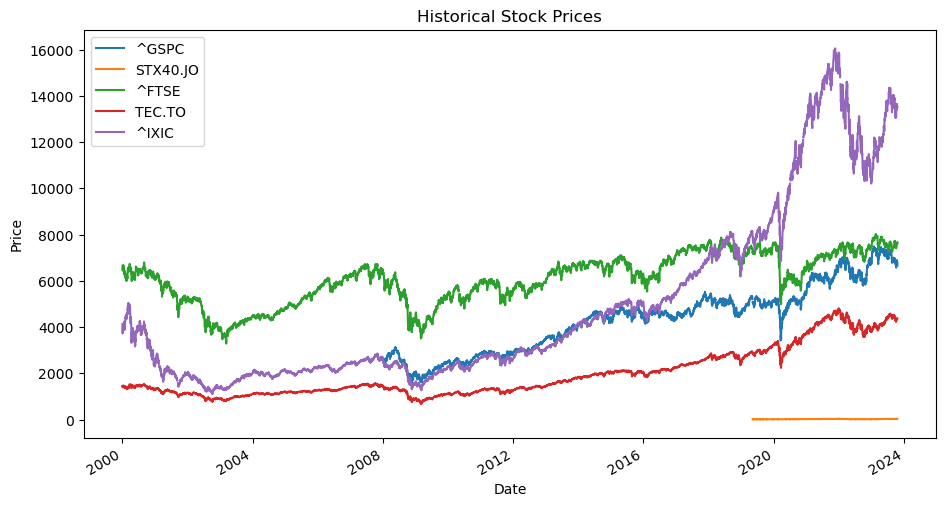

In [52]:
data_portfolio['Adj Close'].plot(figsize=(11, 6))
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(indices)
plt.show()

### Step 2: Model the state of uncertainty

In [54]:
# Calculate the daily returns for each index using the 'Adj Close' column
daily_return_sp_500 = data_sp_500['Adj Close'].pct_change().dropna()
daily_return_satrix_40 = data_satrix_40['Adj Close'].pct_change().dropna()
daily_return_ftse = data_ftse['Adj Close'].pct_change().dropna()
daily_return_tec_to = data_tec_to['Adj Close'].pct_change().dropna()
daily_return_nasdaq = data_nasdaq['Adj Close'].pct_change().dropna()

# Calculate the mean and standard deviation (volatility) of the daily returns for each index
mean_return_sp_500 = daily_return_sp_500.mean()
volatility_sp_500 = daily_return_sp_500.std()

mean_return_satrix_40 = daily_return_satrix_40.mean()
volatility_satrix_40 = daily_return_satrix_40.std()

mean_return_ftse = daily_return_ftse.mean()
volatility_ftse = daily_return_ftse.std()

mean_return_tec_to = daily_return_tec_to.mean()
volatility_tec_to = daily_return_tec_to.std()

mean_return_nasdaq = daily_return_nasdaq.mean()
volatility_nasdaq = daily_return_nasdaq.std()

# Display the calculated mean returns and volatilities
mean_return_sp_500, volatility_sp_500, mean_return_satrix_40, volatility_satrix_40, mean_return_ftse, volatility_ftse, mean_return_tec_to, volatility_tec_to, mean_return_nasdaq, volatility_nasdaq


(0.00025908454235784383,
 0.01239134219624941,
 0.0003213809457653834,
 0.013387601745622441,
 8.951166127099275e-05,
 0.011647404272471946,
 0.000733537719223612,
 0.015902775658614483,
 0.0003225919626918441,
 0.015902110006837316)

### Step 3: Monte Carlo Simulation

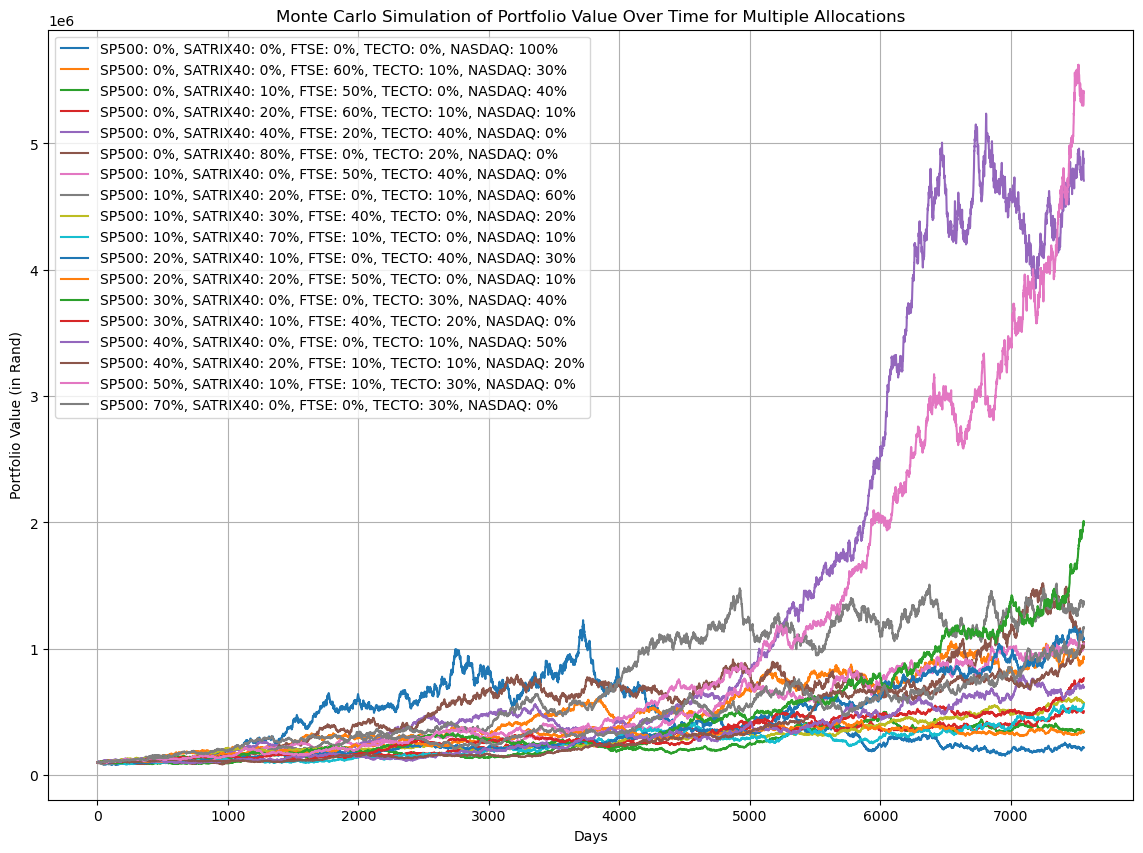

,S&P 500 Allocation,SATRIX 40 Allocation,FTSE Allocation,TECTO Allocation,NASDAQ Allocation,Final Portfolio Value
0,0.0,0.0,0.0,0.0,1.0,2.176835e+05
1,0.0,0.0,0.0,0.1,0.9,1.885668e+06
2,0.0,0.0,0.0,0.2,0.8,1.480873e+06
3,0.0,0.0,0.0,0.3,0.7,8.797983e+05
4,0.0,0.0,0.0,0.4,0.6,5.303091e+05


In [57]:
# Monte Carlo simulation settings
num_simulations = 1000  # Number of simulations
num_years = 30  # Number of years to simulate
initial_investment = 100000  # Initial investment in Rand (R100,000)

# Possible allocations for each index (in fractions)
allocations = np.linspace(0, 1, 11)

# Initialize an empty DataFrame to store the final portfolio values for each simulation
df_results_multi_alloc = pd.DataFrame()

# Store results
results = []

# Run Monte Carlo simulation
np.random.seed(42)
for alloc_sp500 in allocations:
    for alloc_satrix40 in allocations:
        for alloc_ftse in allocations:
            for alloc_tec_to in allocations:
                for alloc_nasdaq in allocations:
                    if alloc_sp500 + alloc_satrix40 + alloc_ftse + alloc_tec_to + alloc_nasdaq == 1:  # Make sure allocations sum to 1
                        portfolio_return = (alloc_sp500 * mean_return_sp_500 +
                                            alloc_satrix40 * mean_return_satrix_40 +
                                            alloc_ftse * mean_return_ftse +
                                            alloc_tec_to * mean_return_tec_to +
                                            alloc_nasdaq * mean_return_nasdaq)

                        portfolio_volatility = np.sqrt((alloc_sp500 * volatility_sp_500)**2 +
                                                      (alloc_satrix40 * volatility_satrix_40)**2 +
                                                      (alloc_ftse * volatility_ftse)**2 +
                                                      (alloc_tec_to * volatility_tec_to)**2 +
                                                      (alloc_nasdaq * volatility_nasdaq)**2)

                        # Simulate portfolio value
                        portfolio_values = [initial_investment]
                        
                        for i in range(int(252 * num_years)):  # 252 trading days in a year
                            daily_return = np.random.normal(portfolio_return, portfolio_volatility)
                            portfolio_values.append(portfolio_values[-1] * (1 + daily_return))
                            
                        # Store the final portfolio value in the DataFrame
                        label = f"SP500: {int(alloc_sp500*100)}%, SATRIX40: {int(alloc_satrix40*100)}%, FTSE: {int(alloc_ftse*100)}%, TECTO: {int(alloc_tec_to*100)}%, NASDAQ: {int(alloc_nasdaq*100)}%"
                        df_results_multi_alloc[label] = portfolio_values

                        # Store results
                        final_portfolio_value = portfolio_values[-1]
                        results.append((alloc_sp500, alloc_satrix40, alloc_ftse, alloc_tec_to, alloc_nasdaq, final_portfolio_value))

# Plot some selected time-series simulations from the results
plt.figure(figsize=(14, 10))
for column in df_results_multi_alloc.columns[::50]:  # Select some columns for visibility
    plt.plot(df_results_multi_alloc.index, df_results_multi_alloc[column], label=column)

plt.xlabel('Days')
plt.ylabel('Portfolio Value (in Rand)')
plt.title('Monte Carlo Simulation of Portfolio Value Over Time for Multiple Allocations')
plt.legend()
plt.grid(True)
plt.show()
                        

# Convert results to DataFrame for easier analysis
df_results = pd.DataFrame(results, columns=['S&P 500 Allocation', 'SATRIX 40 Allocation', 'FTSE Allocation', 'TECTO Allocation', 'NASDAQ Allocation', 'Final Portfolio Value'])

# Display some of the simulation results
df_results.head()

#### Optimal Allocation of Funds

In [60]:
# Find the allocation with the highest final portfolio value
optimal_allocation = df_results[df_results['Final Portfolio Value'] == df_results['Final Portfolio Value'].max()]
optimal_allocation

,S&P 500 Allocation,SATRIX 40 Allocation,FTSE Allocation,TECTO Allocation,NASDAQ Allocation,Final Portfolio Value
158,0.0,0.3,0.0,0.5,0.2,4.400370e+07


The optimal asset allocation that maximizes the final portfolio value after 30 years is as follows:

- 0% in S&P 500
- 30% in SATRIX 40
- 0% in FTSE
- 50% in TECTO
- 20% in NASDAQ

With this allocation, the final portfolio value is approximately \( R44,003,700 \).

This suggests that for the given parameters and historical data, investing heavily in TECTO and moderately in SATRIX 40 and NASDAQ while avoiding S&P 500 and FTSE would yield the highest expected return over a 30-year period.

#### Qualitative Analysis

The proposed allocation our our portfolio analysis suggests a diversified exposure to different market segments and geographical areas through the selected indices. Here's a qualitative analysis based on the gathered data:

##### SATRIX 40:

SATRIX 40 is an ETF that aims to replicate the performance of the ALSI 40 Index, comprising the top 40 companies on the Johannesburg Securities Exchange (JSE).
In the first quarter of 2023, 21 of the top 40 companies on the JSE saw growth due to promising financial results and positive outlooks for the rest of the year.
Historical performance and forecasts indicate a potential range of price movement for SATRIX 40 in 2023.

##### TEC.TO (TD Global Technology Leaders):

This index has shown strong performance with a 35.27% YTD Daily Total Return and provides exposure to global tech companies.
It's recommended for global tech exposure with a competitive fee of 0.35% MER.

##### NASDAQ:

The NASDAQ index experienced a significant growth rate of 38.8% in the first half of 2023.
However, it faced negative returns in September 2023, indicating potential volatility.
In the long term, the NASDAQ has shown resilience with recovery to new highs post market crashes, suggesting a healthy future for the index.
In the third quarter of 2023, NASDAQ reported a 6% increase in net revenues, indicating a positive financial performance.


##### Observation

The allocation towards TEC.TO provides substantial exposure to the global tech sector, which has been performing well. SATRIX 40 provides exposure to the South African market, diversifying geographical risk. The NASDAQ allocation offers exposure to a broad range of US-based and global companies, although it has shown recent volatility. Overall, this allocation could offer a balanced diversification with a tech tilt, given the current and forecasted market conditions of the indices involved.